# Exploring Francis Crick Institute Datasets from OpenAlex

This notebook helps you explore the datasets retrieved from the OpenAlex API.

**Prerequisites:** Run `openalex_crick_datasets.py` first to generate the `crick_datasets.json` file.

## 1. Load the Data

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

# Set style for prettier plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Load the datasets
with open('crick_datasets.json', 'r', encoding='utf-8') as f:
    datasets = json.load(f)

print(f"Loaded {len(datasets)} datasets")

Loaded 747 datasets


## 2. Basic Overview

In [3]:
# Convert to DataFrame for easier analysis
df = pd.DataFrame(datasets)

# Display basic info
print("Dataset columns:")
print(df.columns.tolist())
print(f"\nShape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset columns:
['id', 'doi', 'title', 'display_name', 'publication_year', 'publication_date', 'ids', 'language', 'primary_location', 'type', 'indexed_in', 'open_access', 'authorships', 'institutions', 'countries_distinct_count', 'institutions_distinct_count', 'corresponding_author_ids', 'corresponding_institution_ids', 'apc_list', 'apc_paid', 'fwci', 'has_fulltext', 'cited_by_count', 'citation_normalized_percentile', 'cited_by_percentile_year', 'biblio', 'is_retracted', 'is_paratext', 'is_xpac', 'primary_topic', 'topics', 'keywords', 'concepts', 'mesh', 'locations_count', 'locations', 'best_oa_location', 'sustainable_development_goals', 'awards', 'funders', 'has_content', 'content_urls', 'referenced_works_count', 'referenced_works', 'related_works', 'abstract_inverted_index', 'counts_by_year', 'updated_date', 'created_date']

Shape: (747, 49)

First few rows:


,id,doi,title,display_name,publication_year,publication_date,ids,language,primary_location,type,...,funders,has_content,content_urls,referenced_works_count,referenced_works,related_works,abstract_inverted_index,counts_by_year,updated_date,created_date
0,https://openalex.org/W3200048209,https://doi.org/10.7910/dvn/qoi6ir,Value TB Dataset: costs per intervention,Value TB Dataset: costs per intervention,2021,2021-02-12,{'openalex': 'https://openalex.org/W3200048209...,en,"{'id': 'pmh:oai:datacompass.lshtm.ac.uk:2492',...",dataset,...,[],"{'pdf': False, 'grobid_xml': False}",None,0,[],"[https://openalex.org/W2748952813, https://ope...","{'This': [0], 'dataset': [1], 'presents': [2],...","[{'year': 2025, 'cited_by_count': 1}, {'year':...",2025-11-06T06:51:31.235846,2025-10-10T00:00:00
1,https://openalex.org/W2756114564,https://doi.org/10.7910/dvn/yqyes9,Replication Data for: Crude childhood vaccinat...,Replication Data for: Crude childhood vaccinat...,2017,2017-01-23,{'openalex': 'https://openalex.org/W2756114564...,en,"{'id': 'pmh:doi:10.7910/DVN/YQYES9', 'is_oa': ...",dataset,...,[],"{'pdf': False, 'grobid_xml': False}",None,0,[],"[https://openalex.org/W2021440477, https://ope...","{'&lt;p&gt;Africa': [0], 'currently': [1], 'ha...","[{'year': 2021, 'cited_by_count': 2}, {'year':...",2025-11-06T06:51:31.235846,2025-10-10T00:00:00
2,https://openalex.org/W4398269073,https://doi.org/10.7910/dvn/kbmn8n,Referral data for 2018-2019 in the neonatal ar...,Referral data for 2018-2019 in the neonatal ar...,2023,2023-02-03,{'openalex': 'https://openalex.org/W4398269073...,en,"{'id': 'doi:10.7910/dvn/kbmn8n', 'is_oa': True...",dataset,...,[],"{'pdf': False, 'grobid_xml': False}",None,0,[],"[https://openalex.org/W4391375266, https://ope...","{'&lt;p&gt;This': [0], 'dataset': [1, 63], 'wa...","[{'year': 2023, 'cited_by_count': 3}]",2025-11-06T06:51:31.235846,2025-10-10T00:00:00
3,https://openalex.org/W4398348486,https://doi.org/10.7910/dvn/fxkgrb,Replication Data for: Detection of pathogens a...,Replication Data for: Detection of pathogens a...,2021,2021-11-30,{'openalex': 'https://openalex.org/W4398348486...,en,"{'id': 'doi:10.7910/dvn/fxkgrb', 'is_oa': True...",dataset,...,[],"{'pdf': False, 'grobid_xml': False}",None,0,[],"[https://openalex.org/W2790351610, https://ope...","{'&lt;p&gt;This': [0], 'is': [1, 32], 'a': [2,...","[{'year': 2022, 'cited_by_count': 3}]",2025-11-06T06:51:31.235846,2025-10-10T00:00:00
4,https://openalex.org/W4398811002,https://doi.org/10.7910/dvn/vfczn4,Replication Data for: Surveillance of respirat...,Replication Data for: Surveillance of respirat...,2022,2022-04-28,{'openalex': 'https://openalex.org/W4398811002...,en,"{'id': 'doi:10.7910/dvn/vfczn4', 'is_oa': True...",dataset,...,[],"{'pdf': False, 'grobid_xml': False}",None,0,[],"[https://openalex.org/W2748952813, https://ope...","{'&lt;p&gt;This': [0], 'is': [1], 'a': [2], 'r...","[{'year': 2023, 'cited_by_count': 1}, {'year':...",2025-11-06T06:51:31.235846,2025-10-10T00:00:00


In [4]:
# Look at a single dataset in detail
if len(datasets) > 0:
    print("Example dataset (full structure):")
    print(json.dumps(datasets[0], indent=2))

Example dataset (full structure):
{
  "id": "https://openalex.org/W3200048209",
  "doi": "https://doi.org/10.7910/dvn/qoi6ir",
  "title": "Value TB Dataset: costs per intervention",
  "display_name": "Value TB Dataset: costs per intervention",
  "publication_year": 2021,
  "publication_date": "2021-02-12",
  "ids": {
    "openalex": "https://openalex.org/W3200048209",
    "doi": "https://doi.org/10.7910/dvn/qoi6ir",
    "mag": "3200048209"
  },
  "language": "en",
  "primary_location": {
    "id": "pmh:oai:datacompass.lshtm.ac.uk:2492",
    "is_oa": false,
    "landing_page_url": "https://orcid.org/0000-0003-4233-9080>;",
    "pdf_url": null,
    "source": {
      "id": "https://openalex.org/S4306400091",
      "display_name": "London School of Hygiene & Tropical Medicine",
      "issn_l": null,
      "issn": null,
      "is_oa": false,
      "is_in_doaj": false,
      "is_core": false,
      "host_organization": "https://openalex.org/I4210089966",
      "host_organization_name": "Lond

## 3. Publication Timeline

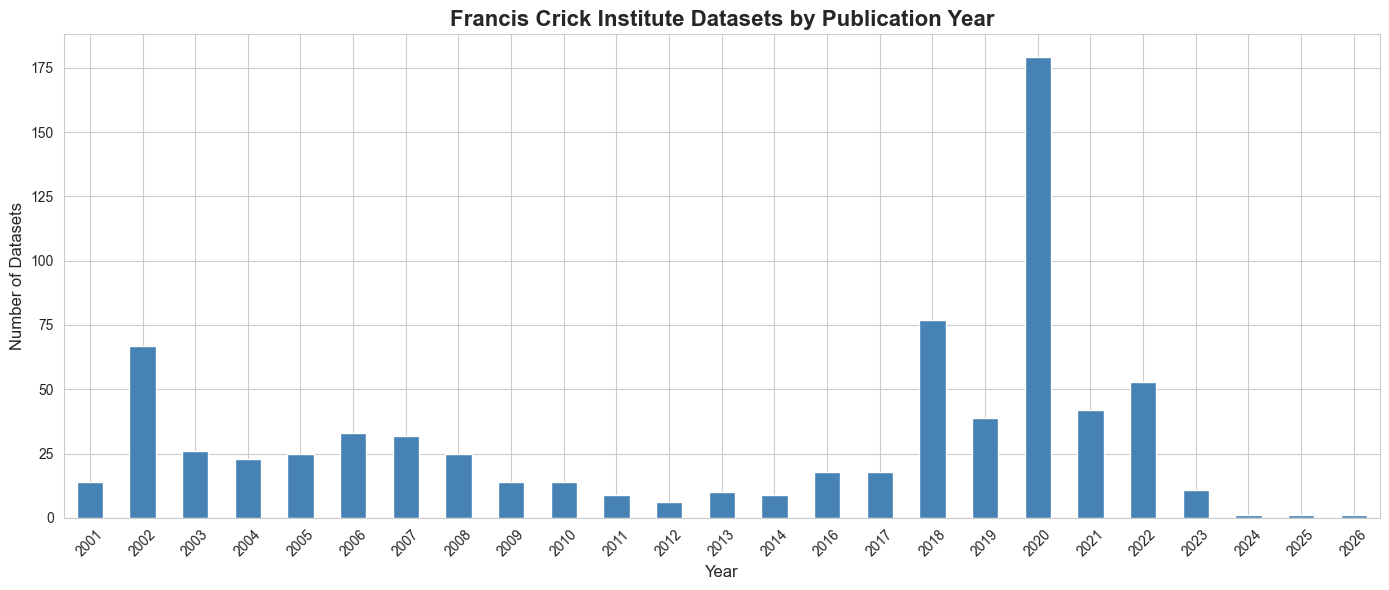


Year range: 2001 - 2026
Peak year: 2020 with 179 datasets


In [5]:
# Datasets by year
year_counts = df['publication_year'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
year_counts.plot(kind='bar', color='steelblue')
plt.title('Francis Crick Institute Datasets by Publication Year', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Datasets', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nYear range: {year_counts.index.min()} - {year_counts.index.max()}")
print(f"Peak year: {year_counts.idxmax()} with {year_counts.max()} datasets")

## 4. Open Access Status

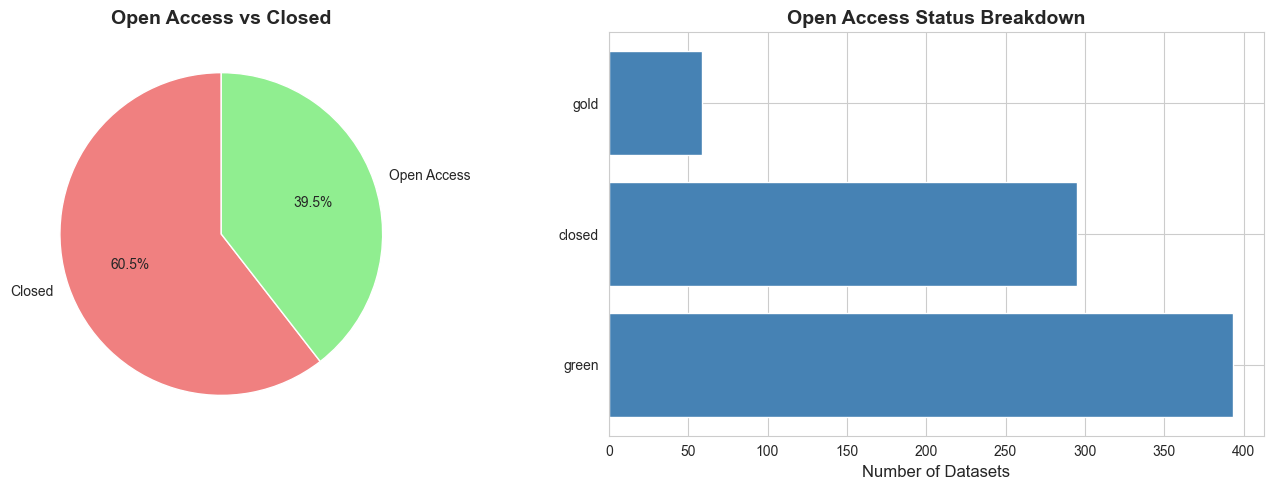


Open Access: 452 (60.5%)
Closed: 295 (39.5%)


In [6]:
# Extract open access status
df['is_oa'] = df['open_access'].apply(lambda x: x.get('is_oa', False) if isinstance(x, dict) else False)
df['oa_status'] = df['open_access'].apply(lambda x: x.get('oa_status', 'closed') if isinstance(x, dict) else 'closed')

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Open vs Closed
oa_counts = df['is_oa'].value_counts()
ax1.pie(oa_counts, labels=['Closed', 'Open Access'], autopct='%1.1f%%', 
        colors=['lightcoral', 'lightgreen'], startangle=90)
ax1.set_title('Open Access vs Closed', fontsize=14, fontweight='bold')

# OA Status breakdown
oa_status_counts = df['oa_status'].value_counts()
ax2.barh(oa_status_counts.index, oa_status_counts.values, color='steelblue')
ax2.set_xlabel('Number of Datasets', fontsize=12)
ax2.set_title('Open Access Status Breakdown', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nOpen Access: {oa_counts.get(True, 0)} ({oa_counts.get(True, 0)/len(df)*100:.1f}%)")
print(f"Closed: {oa_counts.get(False, 0)} ({oa_counts.get(False, 0)/len(df)*100:.1f}%)")

## 5. Citation Analysis

In [7]:
# Citation statistics
df['cited_by_count'] = df['cited_by_count'].fillna(0).astype(int)

print("Citation Statistics:")
print(f"Total citations: {df['cited_by_count'].sum():,}")
print(f"Mean citations per dataset: {df['cited_by_count'].mean():.1f}")
print(f"Median citations: {df['cited_by_count'].median():.0f}")
print(f"Max citations: {df['cited_by_count'].max()}")

# Top 10 most cited datasets
print("\n" + "="*80)
print("Top 10 Most Cited Datasets:")
print("="*80)
top_cited = df.nlargest(10, 'cited_by_count')[['title', 'publication_year', 'cited_by_count', 'doi']]
for idx, row in top_cited.iterrows():
    print(f"\n{row['cited_by_count']} citations - {row['title']}")
    print(f"  Year: {row['publication_year']} | DOI: {row['doi']}")

Citation Statistics:
Total citations: 58
Mean citations per dataset: 0.1
Median citations: 0
Max citations: 7

Top 10 Most Cited Datasets:

7 citations - Value TB Dataset: costs per intervention
  Year: 2021 | DOI: https://doi.org/10.7910/dvn/qoi6ir

3 citations - Replication Data for: Crude childhood vaccination coverage in West Africa: trends and predictors of completeness
  Year: 2017 | DOI: https://doi.org/10.7910/dvn/yqyes9

3 citations - Referral data for 2018-2019 in the neonatal arm of the Clinical Information Network (CIN-Neonatal)
  Year: 2023 | DOI: https://doi.org/10.7910/dvn/kbmn8n

3 citations - Replication Data for: Detection of pathogens associated with early-onset neonatal sepsis in cord blood at birth using quantitative PCR
  Year: 2021 | DOI: https://doi.org/10.7910/dvn/fxkgrb

3 citations - Replication Data for: Surveillance of respiratory viruses at health facilities from across Kenya, 2014
  Year: 2022 | DOI: https://doi.org/10.7910/dvn/vfczn4

2 citations - Repli

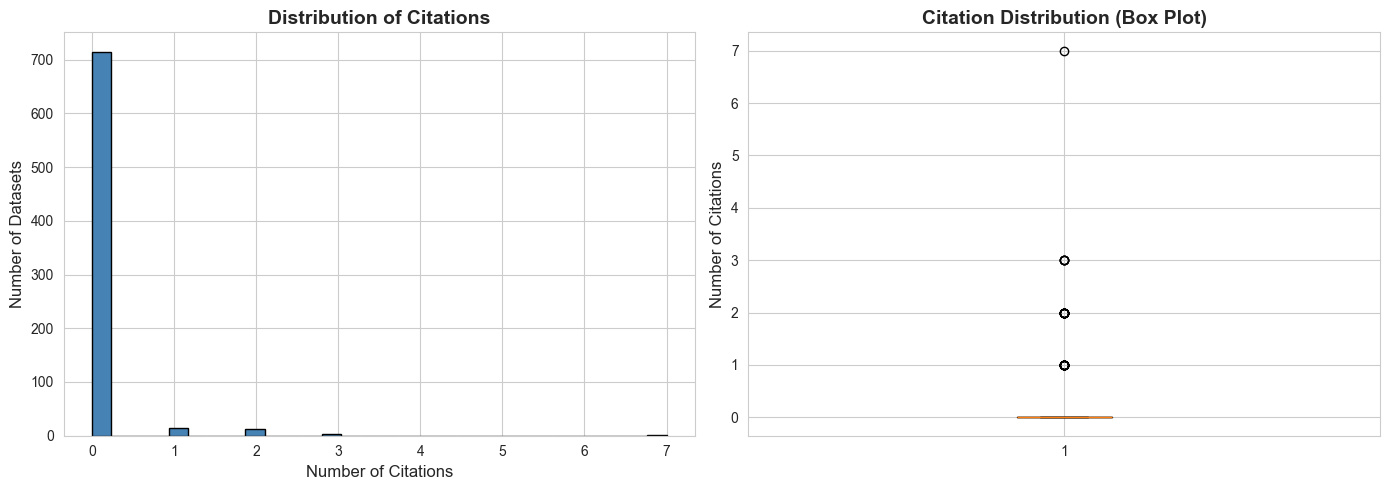

In [8]:
# Citation distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(df['cited_by_count'], bins=30, color='steelblue', edgecolor='black')
ax1.set_xlabel('Number of Citations', fontsize=12)
ax1.set_ylabel('Number of Datasets', fontsize=12)
ax1.set_title('Distribution of Citations', fontsize=14, fontweight='bold')

# Box plot
ax2.boxplot(df['cited_by_count'], vert=True)
ax2.set_ylabel('Number of Citations', fontsize=12)
ax2.set_title('Citation Distribution (Box Plot)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Research Topics & Concepts

In [ ]:
# Extract concepts/topics
all_concepts = []
for dataset in datasets:
    concepts = dataset.get('concepts', [])
    for concept in concepts:
        if concept.get('level') == 0:  # Top-level concepts
            all_concepts.append(concept.get('display_name'))

# Count and visualize
concept_counts = Counter(all_concepts)
top_concepts = dict(concept_counts.most_common(15))

plt.figure(figsize=(12, 6))
plt.barh(list(top_concepts.keys()), list(top_concepts.values()), color='coral')
plt.xlabel('Number of Datasets', fontsize=12)
plt.title('Top 15 Research Areas (Level 0 Concepts)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nTotal unique top-level concepts: {len(concept_counts)}")

## 7. Author Analysis

In [ ]:
# Extract author information
all_authors = []
for dataset in datasets:
    authorships = dataset.get('authorships', [])
    for authorship in authorships:
        author = authorship.get('author', {})
        author_name = author.get('display_name')
        if author_name:
            all_authors.append(author_name)

# Most prolific authors
author_counts = Counter(all_authors)
top_authors = dict(author_counts.most_common(20))

print("Top 20 Most Prolific Authors:")
print("="*60)
for i, (author, count) in enumerate(top_authors.items(), 1):
    print(f"{i:2d}. {author:40s} - {count} datasets")

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(list(top_authors.keys()), list(top_authors.values()), color='mediumpurple')
plt.xlabel('Number of Datasets', fontsize=12)
plt.title('Top 20 Authors by Dataset Count', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Search and Filter Datasets

In [ ]:
# Search by keyword in title
def search_datasets(keyword, df):
    """Search for datasets containing a keyword in the title."""
    mask = df['title'].str.contains(keyword, case=False, na=False)
    results = df[mask][['title', 'publication_year', 'cited_by_count', 'doi']]
    print(f"Found {len(results)} datasets containing '{keyword}':\n")
    for idx, row in results.iterrows():
        print(f"• {row['title']}")
        print(f"  Year: {row['publication_year']} | Citations: {row['cited_by_count']} | DOI: {row['doi']}\n")
    return results

# Example searches - modify these keywords as needed
search_datasets('genomic', df)

In [ ]:
# Another example search
search_datasets('protein', df)

In [ ]:
# Filter by year range
def filter_by_year(start_year, end_year, df):
    """Filter datasets by year range."""
    mask = (df['publication_year'] >= start_year) & (df['publication_year'] <= end_year)
    results = df[mask]
    print(f"Found {len(results)} datasets between {start_year} and {end_year}")
    return results

# Example: datasets from 2020-2023
recent = filter_by_year(2020, 2023, df)
print(f"\nMost cited recent datasets:")
recent.nlargest(5, 'cited_by_count')[['title', 'publication_year', 'cited_by_count']]

## 9. Export Filtered Results

In [ ]:
# Export highly cited datasets to CSV
highly_cited = df[df['cited_by_count'] >= 10].copy()
highly_cited_export = highly_cited[['title', 'publication_year', 'cited_by_count', 'doi', 'is_oa']]
highly_cited_export.to_csv('highly_cited_crick_datasets.csv', index=False)
print(f"Exported {len(highly_cited)} highly cited datasets to 'highly_cited_crick_datasets.csv'")

In [ ]:
# Create a summary report
summary = {
    'total_datasets': len(df),
    'year_range': f"{df['publication_year'].min()} - {df['publication_year'].max()}",
    'total_citations': int(df['cited_by_count'].sum()),
    'avg_citations': round(df['cited_by_count'].mean(), 2),
    'open_access_percent': round(df['is_oa'].sum() / len(df) * 100, 1),
    'top_author': author_counts.most_common(1)[0] if author_counts else ('N/A', 0),
    'most_cited_dataset': df.nlargest(1, 'cited_by_count')['title'].values[0] if len(df) > 0 else 'N/A'
}

print("\n" + "="*80)
print("FRANCIS CRICK INSTITUTE DATASETS - SUMMARY REPORT")
print("="*80)
for key, value in summary.items():
    print(f"{key.replace('_', ' ').title():30s}: {value}")
print("="*80)